In [1]:
# Import necessary libraries
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier  # Corrected typo
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install Xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


First, we import the data set

In [2]:
df=pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
df.shape

(303, 18)

Let's take a look at the data features:

### data features 

- age
- sex
- chest pain type (cp)
- resting blood pressure(trestbps)
- serum cholesterol (chol) 
- fasting blood sugar(fbs)
- resting electrocardiographic results (restecg)
- maximum heart rate achieved (thalach) 
- exercise-induced angina (exang)
- ST depression induced by exercise relative to rest (oldpeak)
- the slope of the peak exercise ST segment (slope)
- number of major vessels colored by flourosopy (ca)
- thalassemia (thal)
- target: heart diseases or not

We rename the columns for easy understanding of feature

In [3]:
df.columns = ('age','sex','chest_pain','resting_blood_pressure','cholesterol','fasting_blood_sugar',
              'rest_ecg','max_heart_rate','exercise_induced_angina','st_depression','st_slope',
              'num_major_vessels','thalassemia', 'target')

df.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Now we begin the data exploration to gain an overview of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain               303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate           303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

Statistical Analysis of the data

In [5]:
df.describe()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking for  missing data and missing data vizualization

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

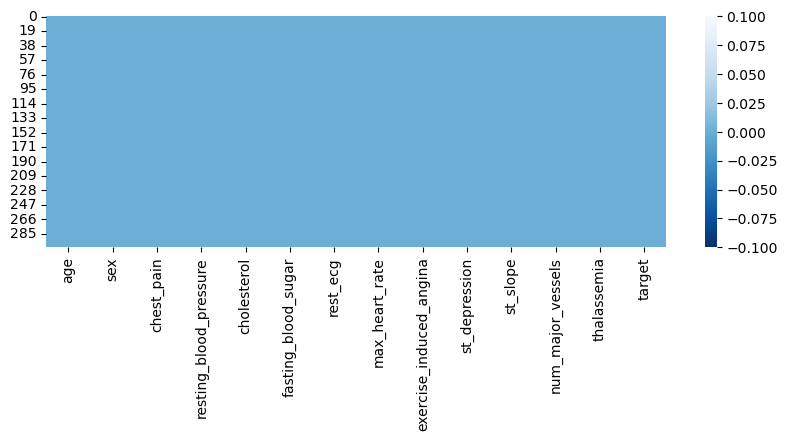

In [6]:
#check for missing
print(df.isnull().sum())
#Visualizing missing data

plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar = True, cmap ='Blues_r')

At the absense of null data, we begin with numerical features assessment using boxplot to look for outliers

<Axes: xlabel='thalassemia'>

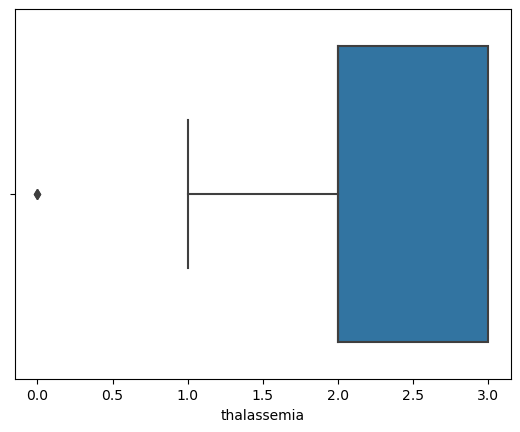

In [7]:
#checking for outliers
sns.boxplot(x =df['thalassemia'])

We observe a single outlier data in the thalassemia feature

<Axes: xlabel='cholesterol'>

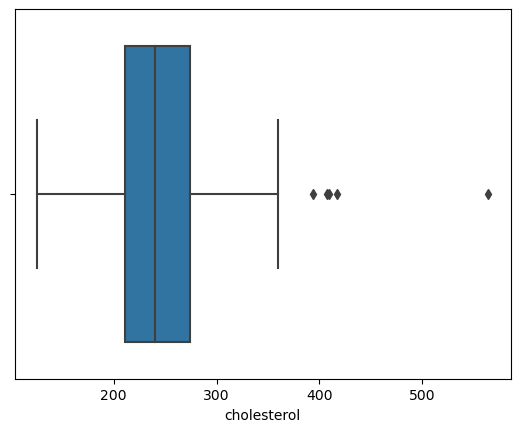

In [8]:
sns.boxplot(x =df['cholesterol'])

Four patients exhibit more than the average cholesterol level in the data

<Axes: xlabel='resting_blood_pressure'>

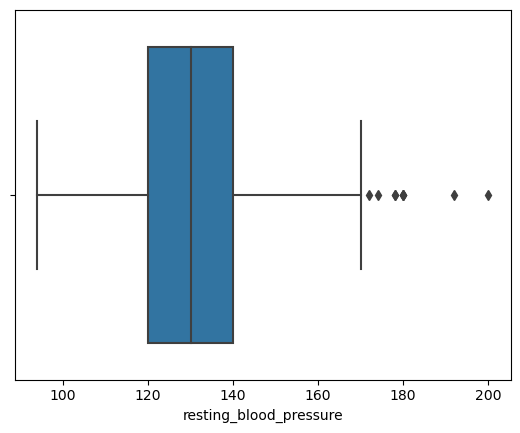

In [9]:
sns.boxplot(x =df['resting_blood_pressure'])

Six patients has resting blood pressure higher than the data interquartile range

<Axes: xlabel='max_heart_rate'>

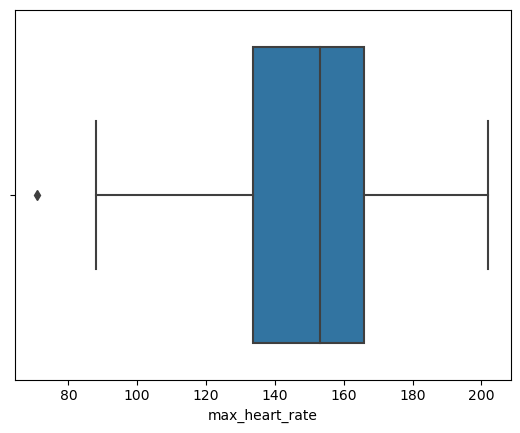

In [10]:
#checking for outliers
sns.boxplot(x =df['max_heart_rate'])

An observable very low heart rate in a patient here as well

#### Categorical Features assessment

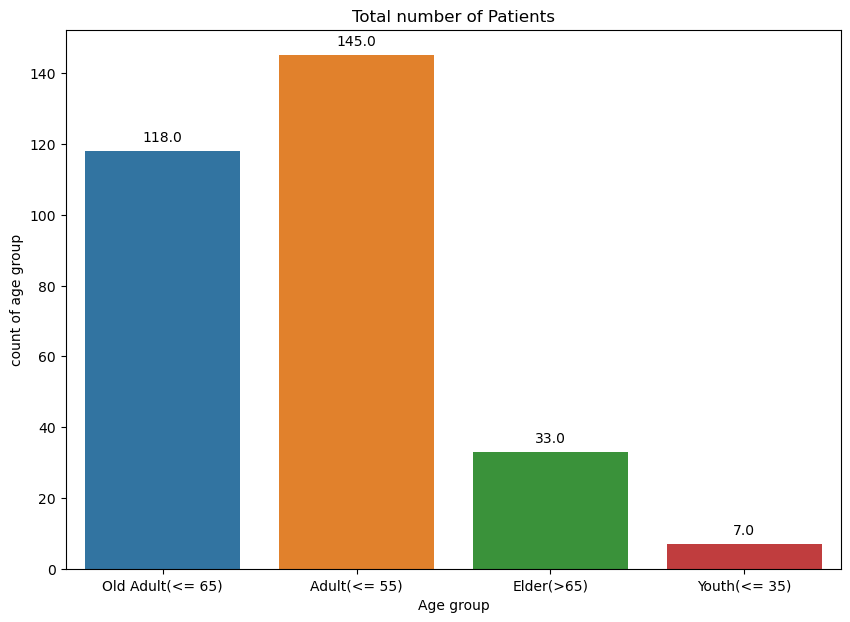

In [11]:
#data visualization
#age bracket

def age_bracket(age):
    if age <= 35:
        return 'Youth(<= 35)'
    elif age <= 55:
        return 'Adult(<= 55)'
    elif age <= 65:
        return 'Old Adult(<= 65)'
    else:
        return'Elder(>65)'
    
df['age_bracket'] =df['age'].apply(age_bracket)
#investigating the patient age group
plt.figure(figsize =(10,7))
ax = sns.countplot(x= 'age_bracket', data = df)
plt.xlabel('Age group')
plt.ylabel('count of age group')
plt.title('Total number of Patients')
           
# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

We created age bracket feature from the data to visualize patient distribution by age group. The highest patient popolation exist within the Adult(<= 55) age bracket

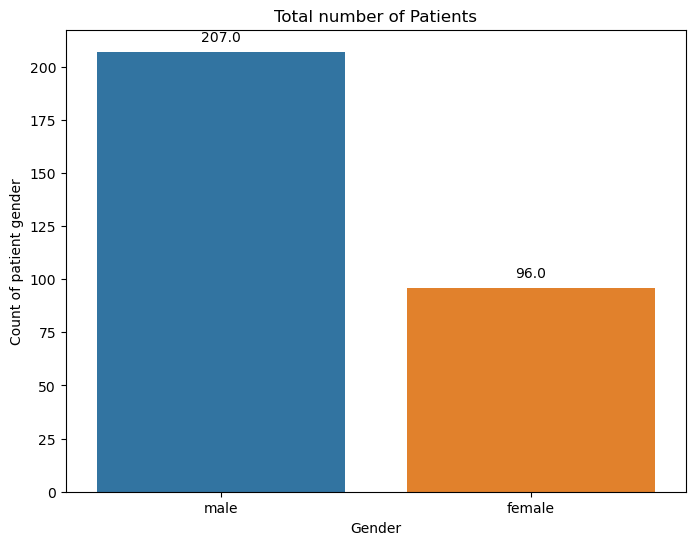

In [12]:
def gender(sex):
    if sex==1:
        return 'male'
    else: 
        return 'female'

df['gender'] = df['sex'].apply(gender)

#investigating the patient gender
plt.figure(figsize =(8,6))
ax = sns.countplot(x= 'gender', data = df)
plt.xlabel('Gender')
plt.ylabel('Count of patient gender')
plt.title('Total number of Patients')

# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()           

Similarly, gender distribution showed more male (207) patients than female (96)

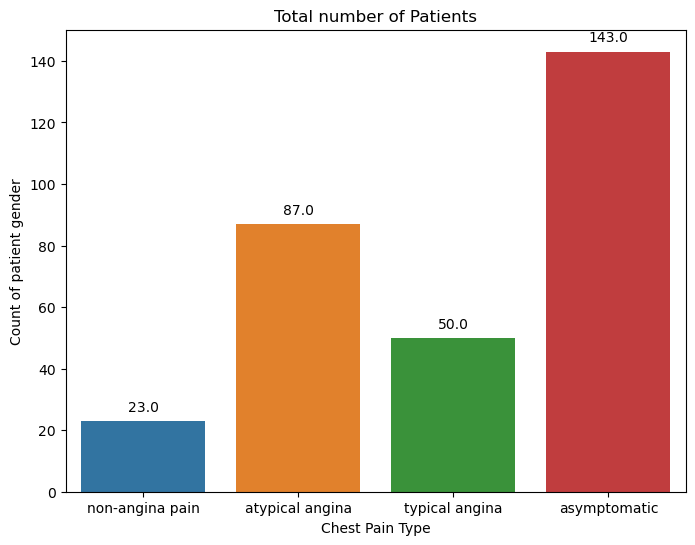

In [13]:
def chest_pain(cp):
    if cp==1:
        return 'typical angina'
    elif cp == 2:
        return 'atypical angina'
    elif cp == 3:
        return 'non-angina pain'
    else: 
        return 'asymptomatic'

df['cp_cat'] = df['chest_pain'].apply(chest_pain)

#investigating the patient gender
plt.figure(figsize =(8,6))
ax = sns.countplot(x= 'cp_cat', data = df)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count of patient gender')
plt.title('Total number of Patients')

# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()  

According to the data, asymptomatic chest pain and atypical angina are the most commonly reported types of chest pain among patients. 

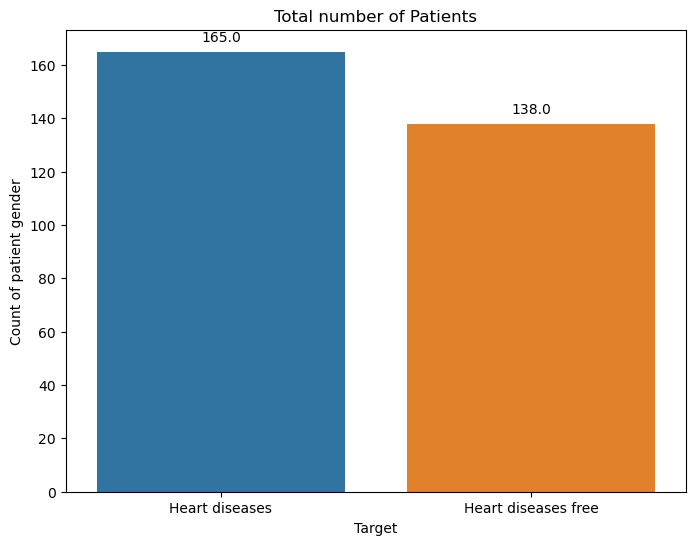

In [14]:
def target(tg):
    if tg==1:
        return 'Heart diseases'
    else: 
        return 'Heart diseases free'

df['status'] = df['target'].apply(target)

#investigating the patient gender
plt.figure(figsize =(8,6))
ax = sns.countplot(x= 'status', data = df)
plt.xlabel('Target')
plt.ylabel('Count of patient gender')
plt.title('Total number of Patients')

# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()  

An almost even distribution of patients diagnosed with heart diseases and no heart diseases is observed in the data

### Bivariate Analysis of patients bases on heart diseases status

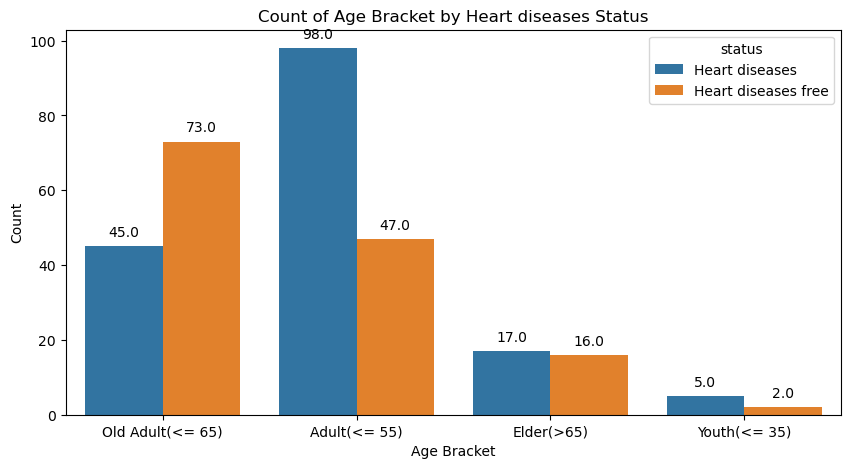

In [15]:
plt.figure(figsize= (10, 5))
ax = sns.countplot(x= "age_bracket", hue = 'status', data = df)
plt.xlabel('Age Bracket')
plt.ylabel('Count')
plt.title('Count of Age Bracket by Heart diseases Status')

# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()


Patients within tha age range of 35-55 years are more prone to heart diseases

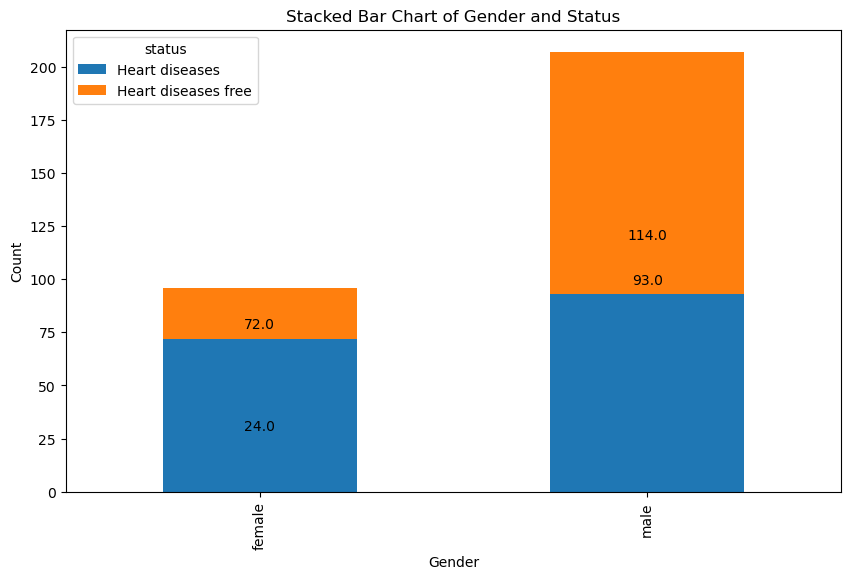

In [16]:
# Create a stacked bar chart
ax = df.groupby(['gender', 'status']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Gender and Status')

# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Show the plot
plt.show()


More males than females are indicated to have heart diseases

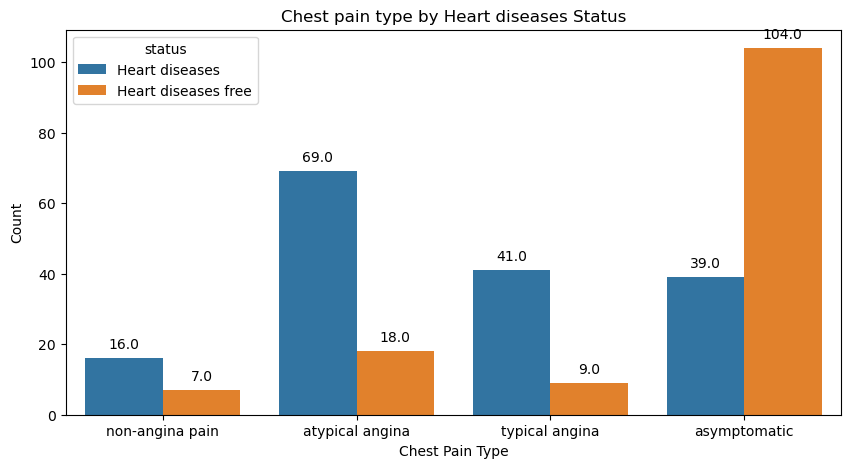

In [17]:
plt.figure(figsize= (10, 5))
ax = sns.countplot(x= "cp_cat", hue = 'status', data = df)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Chest pain type by Heart diseases Status')

# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

Most patient who are asymptomatic of chest pain do not have heart diseases while most patients who suffer atypical angina chest pain have the dieases 

#### Exploring Multiple values using Multivariate analysis

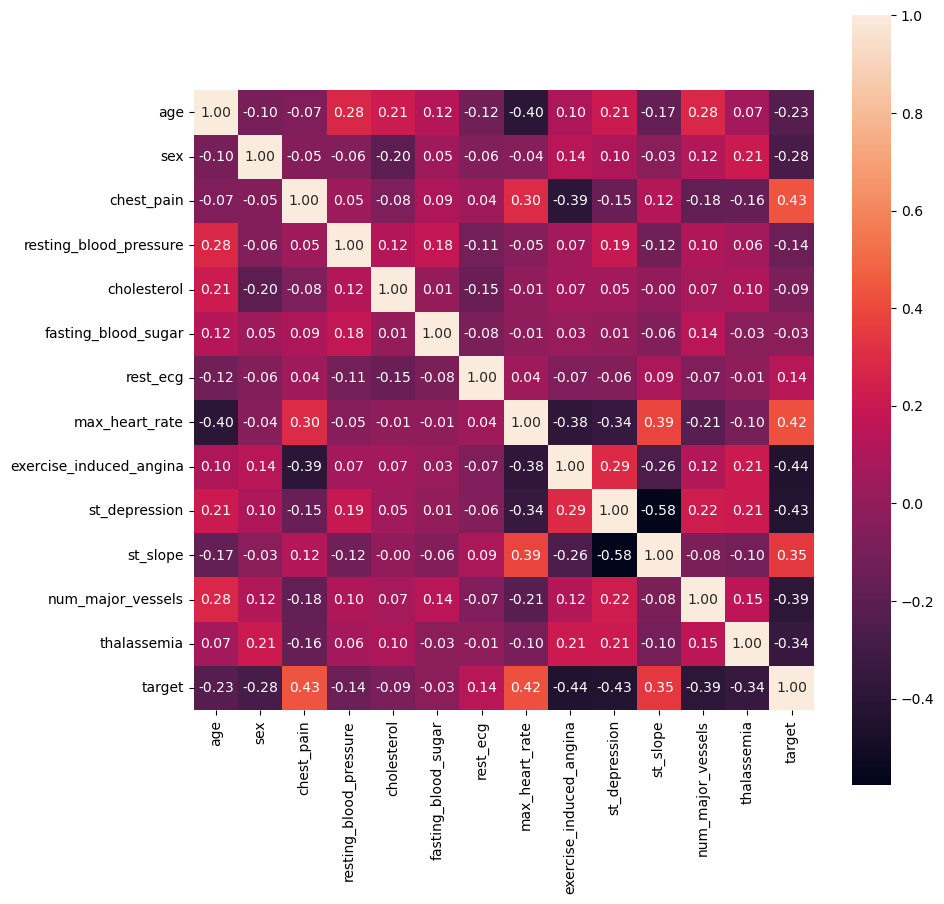

In [18]:
# correlation between all the dataset values
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(), cbar=True, annot=True, square=True,
                      fmt='.2f', annot_kws={'size': 10})



Observations from the correlation heatmap
- Weak negative correlation between age, sex and heart diseases status
- Medium positive correlation between chest pain the and health diseases status
- Exercise induced angina and ST depression induced by exercise relative to rest both indicate moderate negative correlation to disease staus
- The slope of the peak exercise ST segment (slope), number of major vessels colored by flourosopy (ca) and thalassemia (thal) all also indicate lower moderate negative correlation
- The slope of the peak exercise ST segment (slope) and number of major vessels colored by flourosopy (ca) show a negative moderate correlation with each other

#### Feature Engineering and Data Pre_processing

Taking out the unneeded features in the dataset

In [19]:
 #create a copy of the dataset
df1 = df[['age','sex','chest_pain','resting_blood_pressure','cholesterol','fasting_blood_sugar',
              'rest_ecg','max_heart_rate','exercise_induced_angina','st_depression','st_slope',
              'num_major_vessels','thalassemia']]
label = df[['target']]

In [20]:
df1.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [22]:
df1.dtypes

age                          int64
sex                          int64
chest_pain                   int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [27]:
#Dealing with outliers: resting blood pressure, cholesterol and thalassemia

#Normalize the data

scaler = MinMaxScaler()
df1['scaler_RBP']=scaler.fit_transform (df1['resting_blood_pressure'].values.reshape(-1,1))
df1['scaler_chol']=scaler.fit_transform (df1['cholesterol'].values.reshape(-1,1))
df1['scaler_thal']=scaler.fit_transform (df1['thalassemia'].values.reshape(-1,1))
df1['scaler_max_heart_rate']=scaler.fit_transform (df1['max_heart_rate'].values.reshape(-1,1))

df1.drop(['resting_blood_pressure', 'cholesterol', 'thalassemia','max_heart_rate'],inplace =  True, axis =1)
df1.head()



,age,sex,chest_pain,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,scaler_RBP,scaler_chol,scaler_thal,scaler_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


#### Machine learning

In [35]:
 # Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)


In [39]:
#model building

#logistic regression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)  # Assuming X_test is your test data

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, y_pred))

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-score: 0.8387096774193549
AUC-ROC: 0.8372844827586207


logistic regression model resulted in a prediction with:
- Accuracy: 83%
- Precision: 86%
- Recall = 81%
- F1-score: 84%
- AUC-ROC: 83%
    

Indicating that approximately 15% of the time, the model is wrong

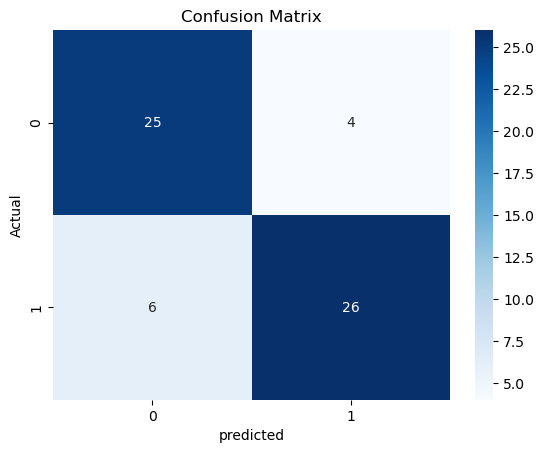

In [42]:
# create a confusion matrix
lcm = confusion_matrix(y_test, y_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot =True, cmap = 'Blues', fmt ='g')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The logistic regression model predicted:
- 4 false negative
- 6 false positive
- 25 true negative
- 26 true positive

In [44]:
#Random forest classifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(X_test)  # Assuming X_test is your test data

print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rfy_pred))
print('Precision:', precision_score(y_test, rfy_pred))
print('Recall:', recall_score(y_test, rfy_pred))
print('F1-score:', f1_score(y_test, rfy_pred))
print('AUC-ROC:', roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1-score: 0.875
AUC-ROC: 0.8685344827586206


Random Forest Classifier resulted in a prediction with:
- Accuracy: 87%
- Precision: 87%
- Recall: 87%
- F1-score: 87%
- AUC-ROC: 87%
    

Indicating that approximately 13% of the time, the model is wrong

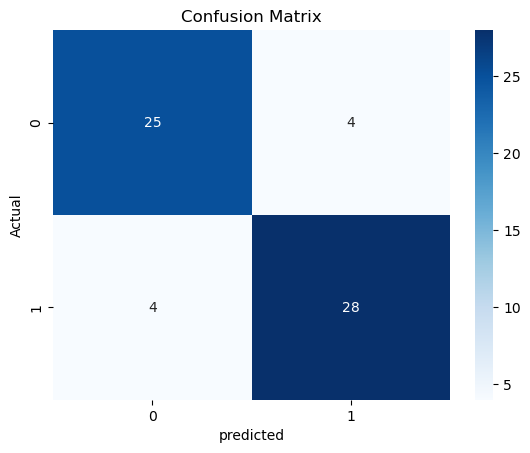

In [45]:
# create a confusion matrix
Rf_cm = confusion_matrix(y_test, rfy_pred)

#Visualize the confusion matrix
sns.heatmap(Rf_cm, annot =True, cmap = 'Blues', fmt ='g')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The RF classifier predicted:
- 4 false negative
- 4 false positive
- 25 true negative
- 28 true positive

Based on the criteria assessment of both models, the random forest classifier is a better learning algorith for the dataset

In [47]:
# Using 8 machine learning algorithm
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGB Classifier': XGBClassifier(),
    'SGD Classifier': SGDClassifier()
}

In [60]:
accuracy_list = {}
precision_list = {}
recall_list = {}
f_list = {}
roc_list = {}

for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
   
    a_score = accuracy_score(y_test, y_pred)
    p_score = precision_score(y_test, y_pred)
    r_score = recall_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)
    
    accuracy_list[model_name] = [str(round(a_score * 100, 2)) + '%']
    precision_list[model_name] = [str(round(p_score * 100, 2)) + '%']
    recall_list[model_name] = [str(round(r_score * 100, 2)) + '%']
    f_list[model_name] = [str(round(f_score * 100, 2)) + '%']
    roc_list[model_name] = [str(round(roc_score * 100, 2)) + '%']
    
    print(f'\n{model_name}')
    print('Accuracy:', accuracy_list[model_name])
    print('Precision:', precision_list[model_name])
    print('Recall:', recall_list[model_name])
    print('F1-score:', f_list[model_name])
    print('AUC-ROC:', roc_list[model_name])
    
    if model_name != list(classifiers.keys())[-1]:
        print('')


Logistic Regression
Accuracy: ['83.61%']
Precision: ['86.67%']
Recall: ['81.25%']
F1-score: ['83.87%']
AUC-ROC: ['83.73%']


Decision Tree
Accuracy: ['85.25%']
Precision: ['92.59%']
Recall: ['78.12%']
F1-score: ['84.75%']
AUC-ROC: ['85.61%']


Random Forest
Accuracy: ['86.89%']
Precision: ['85.29%']
Recall: ['90.62%']
F1-score: ['87.88%']
AUC-ROC: ['86.69%']


SVM
Accuracy: ['65.57%']
Precision: ['65.71%']
Recall: ['71.88%']
F1-score: ['68.66%']
AUC-ROC: ['65.25%']


K-Nearest Neighbors
Accuracy: ['75.41%']
Precision: ['79.31%']
Recall: ['71.88%']
F1-score: ['75.41%']
AUC-ROC: ['75.59%']


Naive Bayes
Accuracy: ['86.89%']
Precision: ['90.0%']
Recall: ['84.38%']
F1-score: ['87.1%']
AUC-ROC: ['87.02%']


XGB Classifier
Accuracy: ['81.97%']
Precision: ['86.21%']
Recall: ['78.12%']
F1-score: ['81.97%']
AUC-ROC: ['82.17%']


SGD Classifier
Accuracy: ['85.25%']
Precision: ['82.86%']
Recall: ['90.62%']
F1-score: ['86.57%']
AUC-ROC: ['84.97%']


In [61]:
print("Accuracy Score")
s1= pd.DataFrame(accuracy_list)
s1.head()

Accuracy Score


,Logistic Regression,Decision Tree,Random Forest,SVM,K-Nearest Neighbors,Naive Bayes,XGB Classifier,SGD Classifier
0,83.61%,85.25%,86.89%,65.57%,75.41%,86.89%,81.97%,85.25%


In [63]:
print("Precision Score")
s2= pd.DataFrame(precision_list)
s2.head()

Precision Score


,Logistic Regression,Decision Tree,Random Forest,SVM,K-Nearest Neighbors,Naive Bayes,XGB Classifier,SGD Classifier
0,86.67%,92.59%,85.29%,65.71%,79.31%,90.0%,86.21%,82.86%


In [64]:
print("Recall Score")
s3= pd.DataFrame(recall_list)
s3.head()

Recall Score


,Logistic Regression,Decision Tree,Random Forest,SVM,K-Nearest Neighbors,Naive Bayes,XGB Classifier,SGD Classifier
0,81.25%,78.12%,90.62%,71.88%,71.88%,84.38%,78.12%,90.62%


In [65]:
print("f1 Score")
s4= pd.DataFrame(f_list)
s4.head()

f1 Score


,Logistic Regression,Decision Tree,Random Forest,SVM,K-Nearest Neighbors,Naive Bayes,XGB Classifier,SGD Classifier
0,83.87%,84.75%,87.88%,68.66%,75.41%,87.1%,81.97%,86.57%


In [67]:
print("AUC Score")
s5= pd.DataFrame(roc_list)
s5.head()

AUC Score


,Logistic Regression,Decision Tree,Random Forest,SVM,K-Nearest Neighbors,Naive Bayes,XGB Classifier,SGD Classifier
0,83.73%,85.61%,86.69%,65.25%,75.59%,87.02%,82.17%,84.97%



In conclusion: 

Tha dataset of 303 patients at Peterside hospital revealed :
- That men are prone to heart diseases more than women
- Heart diseases are common in people in the age category of 35-55 year
- Conditions such as chest pain type is mildly correlated with heart diseases
- Finally, in patient health status prediction based on 8 machine learning algorith, the random forest method showed the most potential in predicting heart patient diseases